<a href="https://colab.research.google.com/github/HarshadaE25/Test-1/blob/main/Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Sentiment Analysis for text

In [1]:
st = "I Liked the Place ....!"


s2 = st.lower()


s2

'i liked the place ....!'

In [2]:
import re

In [3]:
re.sub("[^a-z ]", "", s2)

'i liked the place '

In [4]:
def clean_text(text):
  text = text.lower()
  text = re.sub("[^a-z ]", "", text)
  return text

In [5]:
clean_text("I did not liked the taste, of Sandwich ..!")

'i did not liked the taste of sandwich '

### Step 1 - Data ingestion

In [6]:
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/Restaurant_Reviews.tsv"

In [7]:
print("sentence1\tSentence 2")

sentence1	Sentence 2


In [8]:
import pandas as pd
df = pd.read_csv(url, sep="\t")
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


### Step 2 - Clean the reviews

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [10]:
df["pre"] = df["Review"].apply(clean_text)

In [11]:
df

,Review,Liked,pre
0,Wow... Loved this place.,1,wow loved this place
1,Crust is not good.,0,crust is not good
2,Not tasty and the texture was just nasty.,0,not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday of...
4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so wer...
...,...,...,...
995,I think food should have flavor and texture an...,0,i think food should have flavor and texture an...
996,Appetite instantly gone.,0,appetite instantly gone
997,Overall I was not impressed and would not go b...,0,overall i was not impressed and would not go back
998,"The whole experience was underwhelming, and I ...",0,the whole experience was underwhelming and i t...


### Seperate X and Y(Liked)

In [12]:
X = df["pre"]
Y = df["Liked"]

In [14]:
X

,pre
0,wow loved this place
1,crust is not good
2,not tasty and the texture was just nasty
3,stopped by during the late may bank holiday of...
4,the selection on the menu was great and so wer...
...,...
995,i think food should have flavor and texture an...
996,appetite instantly gone
997,overall i was not impressed and would not go back
998,the whole experience was underwhelming and i t...


In [15]:
Y

,Liked
0,1
1,0
2,0
3,1
4,1
...,...
995,0
996,0
997,0
998,0


In [16]:
Y.value_counts()

,count
Liked,
1,500
0,500


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
tfidf = TfidfVectorizer()

X_pre = tfidf.fit_transform(X).toarray()

X_pre

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
X_pre.shape

(1000, 2046)

### Apply train test split on X_pre

In [20]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [21]:
xtrain.shape

(800, 2046)

In [22]:
xtest.shape

(200, 2046)

In [23]:
xtrain.shape[1]

2046

### Build a neural network

In [24]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout
from keras.callbacks import EarlyStopping

In [25]:
# Intialize the model
model = Sequential()

# Add a input layer
model.add(Input(shape=(xtrain.shape[1],)))

# Add Hidden layer 1
model.add(Dense(units=64, activation="relu"))

# Add dropout layer
model.add(Dropout(rate=0.3))

# Add Hidden Layer 2
model.add(Dense(units=32, activation = "relu"))

# Add droput layer
model.add(Dropout(rate=0.2))

# Output layer
model.add(Dense(units=1, activation="sigmoid"))

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │         131,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 133,121 (520.00 KB)

 Trainable params: 133,121 (520.00 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [28]:
es = EarlyStopping(monitor = "val_loss", patience=15)

In [29]:
hist = model.fit(xtrain, ytrain, validation_split=0.1, epochs=200, callbacks=[es])

Epoch 1/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5189 - loss: 0.6913 - val_accuracy: 0.5875 - val_loss: 0.6903
Epoch 2/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7139 - loss: 0.6771 - val_accuracy: 0.6250 - val_loss: 0.6797
Epoch 3/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7886 - loss: 0.6423 - val_accuracy: 0.7625 - val_loss: 0.6424
Epoch 4/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9038 - loss: 0.5607 - val_accuracy: 0.7875 - val_loss: 0.5689
Epoch 5/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9420 - loss: 0.4120 - val_accuracy: 0.8000 - val_loss: 0.4810
Epoch 6/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9700 - loss: 0.2552 - val_accuracy: 0.7875 - val_loss: 0.4148
Epoch 7/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9770 - loss: 0.1552 - val_accuracy: 0.8500 - val_loss: 0.3830
Epoch 8/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9861 - loss: 0.1051 - val_accuracy: 0.8250 - 

### Evaluate the model

In [30]:
model.evaluate(xtrain, ytrain)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9984 - loss: 0.0058


[0.04594108462333679, 0.9850000143051147]

In [31]:
model.evaluate(xtest, ytest)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7744 - loss: 0.7492 


[0.6973060369491577, 0.7799999713897705]

### Predict the result on test data

In [32]:
yprob_test = model.predict(xtest)
yprob_test[0:5]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


array([[0.13740234],
       [0.9997266 ],
       [0.99987686],
       [0.9995115 ],
       [0.97673833]], dtype=float32)

In [33]:
def predict_sentiment(model, x):
  yprob = model.predict(x)
  ypred = [1 if prob >= 0.5 else 0 for prob in yprob]
  return ypred

In [34]:
ypred_test = predict_sentiment(model, xtest)
ypred_test[0:5]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


[0, 1, 1, 1, 1]

In [35]:
ytest.head()

,Liked
521,1
737,1
740,1
660,1
411,1


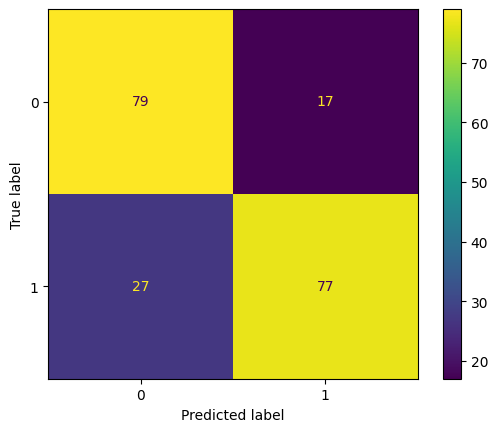

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(ytest, ypred_test)

In [37]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78        96
           1       0.82      0.74      0.78       104

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200



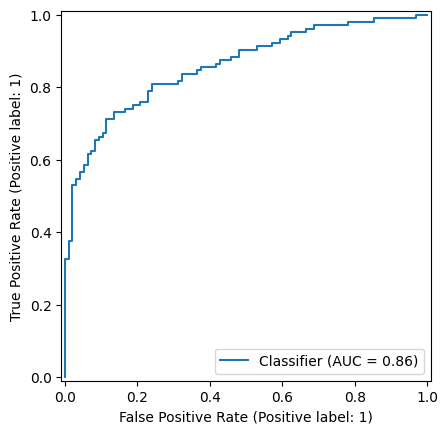

In [38]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(ytest, yprob_test)

### Out of sample prediction

In [39]:
def out_of_sample_pred(text):
  text = clean_text(text)
  text_pre = tfidf.transform([text]).toarray()
  prob = model.predict(text_pre)
  if prob >= 0.5:
    return "positive", prob.round(4)[0][0]
  else:
    return "negative", prob.round(4)[0][0]

In [40]:
text1 = "Very good place, i liked the ambience! ..."
out_of_sample_pred(text1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


('positive', 0.9918)

In [41]:
text2 = "Bad place, Service was so slow."
s2, prob2 = out_of_sample_pred(text2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


In [42]:
s2

'negative'

In [43]:
print(f"Probability : {prob2:.4f}")

Probability : 0.0001


In [44]:
text3 = "The taste was averge overall it was an ok experience"
out_of_sample_pred(text3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


('negative', 0.0475)

In [45]:
text4 = "The service was very good, I was quite impressed by food"
out_of_sample_pred(text4)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


('positive', 0.6253)

In [46]:
model.save("sentiment_model.keras")

### Load the model

In [47]:
from keras.models import load_model

In [48]:
m = load_model("/content/sentiment_model.keras")
m.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │         131,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 399,365 (1.52 MB)

 Trainable params: 133,121 (520.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 266,244 (1.02 MB)